<a href="https://colab.research.google.com/github/aarmintia/imdb/blob/main/Data_Strategist_GCash_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference:
https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("viridis")
import pickle
import glob
import os

Mounted at /content/drive


# Title Basics Table

In [ ]:
df_title_basics0 = pickle.load(open("/content/drive/MyDrive/extracted/title.basics.sav","rb"))
df_title_basics0.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"


In [ ]:
df_title_basics0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10613322 entries, 0 to 10613321
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 728.8+ MB


In [ ]:
df_title_basics0['tconst'].nunique()

10613322

Keep movies only in the dataset

In [ ]:
df_title_basics_copy = df_title_basics0.copy()

In [ ]:
df_title_basics = df_title_basics_copy[(df_title_basics_copy.titleType == "movie") | (df_title_basics_copy.titleType == "tvMovie")]

As part of the study, make a dataset for 2019 and earlier movies

In [ ]:
df_title_basics = df_title_basics[df_title_basics['startYear'] < 2020]

In [ ]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628741 entries, 8 to 10613272
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          628741 non-null  object 
 1   titleType       628741 non-null  object 
 2   primaryTitle    628741 non-null  object 
 3   originalTitle   628741 non-null  object 
 4   isAdult         628741 non-null  float64
 5   startYear       628741 non-null  float64
 6   endYear         0 non-null       float64
 7   runtimeMinutes  453938 non-null  object 
 8   genres          552285 non-null  object 
dtypes: float64(3), object(6)
memory usage: 48.0+ MB


Use Scikit-Learn’s CountVectorizer feature extraction technique to detect and count each unique genre (e.g. drama, comedy, etc). We will create a new column for each unique Genre title and **it will be True/False if a movie has that genre or not**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

temp = df_title_basics.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names_out()
unique_genres_np = np.array(unique_genres)
print(unique_genres_np)

['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'film-noir' 'game-show'
 'history' 'horror' 'music' 'musical' 'mystery' 'news' 'reality-tv'
 'romance' 'sci-fi' 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


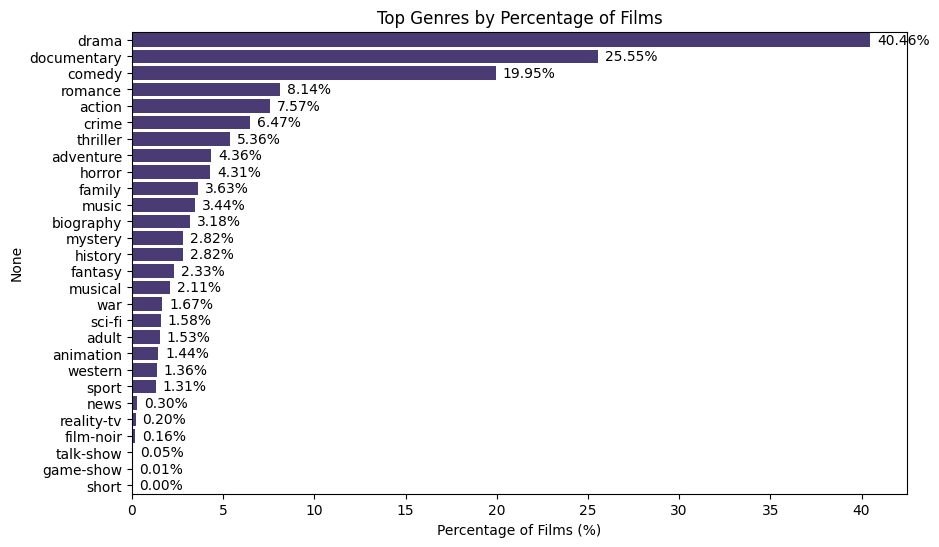

In [ ]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres_np,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]

top5_genres = sorted_genres_perc

plt.figure(figsize=(10,6))
plot = sns.barplot(x=top5_genres.values, y=top5_genres.index, orient="h")

for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}%',
                   (p.get_width(), p.get_y() + p.get_height() / 2),
                   ha='left', va='center',
                   fontsize=10, color='black', xytext=(5, 0),
                   textcoords='offset points')

plt.xlabel("Percentage of Films (%)")
plt.title("Top Genres by Percentage of Films")
plt.show()


# Ratings Table

In [ ]:
df_ratings = pickle.load(open("/content/drive/MyDrive/extracted/title.ratings.sav","rb"))
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2033
1,tt0000002,5.7,272
2,tt0000003,6.5,1977
3,tt0000004,5.4,178
4,tt0000005,6.2,2733


The **ratings** table contains over 1 million movie rating entries.

There are no null values for the ratings table

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412275 entries, 0 to 1412274
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1412275 non-null  object 
 1   averageRating  1412275 non-null  float64
 2   numVotes       1412275 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.3+ MB


The **average rating** is 7 (mean) which is **different from the median** value (7.1). The **average number of votes** is more than a thousand (mean), this time median (26) is **significantly different than the mean**.

In [ ]:
df_ratings.describe()

,averageRating,numVotes
count,1.412275e+06,1.412275e+06
mean,6.955463e+00,1.036110e+03
std,1.385574e+00,1.766918e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.868594e+06


In [ ]:
merged_basics_ratings = pd.merge(df_title_basics, df_ratings, on="tconst")

merged_basics_ratings.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45,Romance,5.3,208
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100,"Documentary,News,Sport",5.2,505
2,tt0000502,movie,Bohemios,Bohemios,0.0,1905.0,NaN,100,NaN,4.1,15
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70,"Action,Adventure,Biography",6.0,874
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90,Drama,5.5,23


In [ ]:
merged_basics_ratings.shape

(316227, 11)

In [ ]:
Total_movies = merged_basics_ratings['tconst'].nunique()
Total_movies_votes = merged_basics_ratings['numVotes'].notnull().sum()
Total_movies_rating = merged_basics_ratings['averageRating'].notnull().sum()
Average_rating = merged_basics_ratings['averageRating'].mean()
Total_voters = merged_basics_ratings['numVotes'].sum()
Average_voters = merged_basics_ratings['numVotes'].mean()
print("The total number of movies is", Total_movies, "\nThe number of total movies with votes is", Total_movies_votes, "\nThe number of total movies with rating is", Total_movies_rating, "\nThe average rating for movies is", Average_rating, "\nThe total number of voters for movies is",Total_voters, "\nThe average number of voters for movies is",Average_voters)

The total number of movies is 316227 
The number of total movies with votes is 316227 
The number of total movies with rating is 316227 
The average rating for movies in 2020 is 6.216412577041177 
The total number of voters for movies is 1037294403 
The average number of voters for movies is 3280.2208634936296


Now list the genres with the highest voter count and sort the table according to the number of votes:

In [ ]:
merged_basics_ratings = merged_basics_ratings.dropna(subset=['genres'])

merged_basics_ratings = merged_basics_ratings.assign(genres=merged_basics_ratings['genres'].str.split(',')).explode('genres')

genre_votes_sum = merged_basics_ratings.groupby('genres')['numVotes'].sum()

genre_votes_sum_sorted = genre_votes_sum.sort_values(ascending=False)

print("Total number of votes for each genre:")
print(genre_votes_sum_sorted)


Total number of votes for each genre:
genres
Drama          522985503
Action         335993916
Comedy         312775874
Adventure      267987155
Crime          200225163
Thriller       170450277
Sci-Fi         133038573
Romance        130293466
Mystery        109625871
Horror          99460629
Fantasy         93483757
Biography       68007440
Animation       61152188
Family          49450552
History         28285151
War             24021231
Music           21959059
Sport           16745915
Documentary     13934303
Western         10463467
Musical          9916867
Film-Noir        3900963
Adult             294968
News              237995
Reality-TV          4193
Game-Show           1281
Talk-Show           1021
Short                  7
Name: numVotes, dtype: int64


In [ ]:
merged_basics_ratings = merged_basics_ratings.dropna(subset=['genres'])

merged_basics_ratings = merged_basics_ratings.assign(genres=merged_basics_ratings['genres'].str.split(',')).explode('genres')

genre_votes_sum = merged_basics_ratings.groupby('genres')['averageRating'].mean()

genre_votes_sum_sorted = genre_votes_sum.sort_values(ascending=False)

print("Average Rating for each genre:")
print(genre_votes_sum_sorted)


Total number of votes for each genre:
genres
News           7.184357
Documentary    7.177647
Biography      6.942858
Music          6.895077
History        6.853951
Reality-TV     6.746491
Sport          6.632153
War            6.476756
Film-Noir      6.463254
Animation      6.458062
Game-Show      6.390000
Talk-Show      6.309091
Musical        6.286206
Drama          6.262987
Family         6.242074
Romance        6.086611
Crime          5.996155
Comedy         5.962904
Fantasy        5.936045
Western        5.880549
Mystery        5.865493
Adventure      5.858385
Action         5.695824
Thriller       5.572794
Adult          5.549644
Sci-Fi         5.349673
Horror         5.019007
Short          5.000000
Name: averageRating, dtype: float64


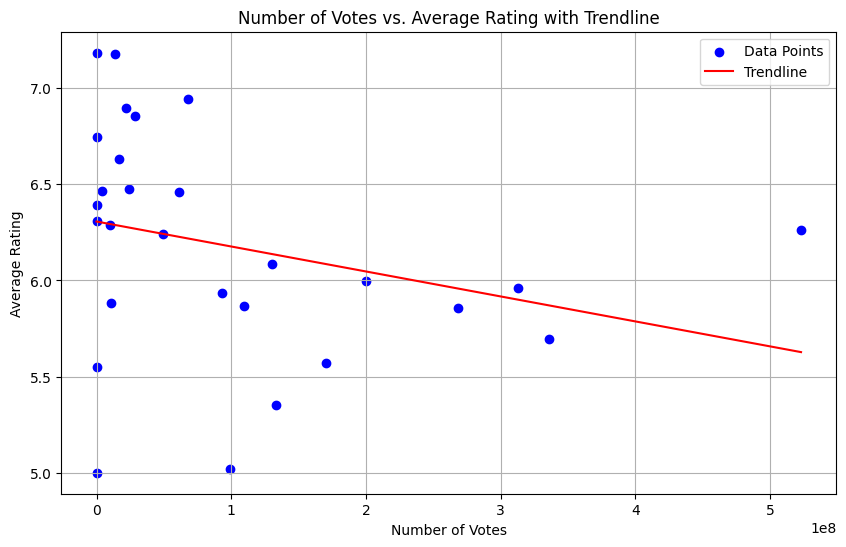

Correlation Coefficient: -0.28492088723917874


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
votes = [522985503, 335993916, 312775874, 267987155, 200225163, 170450277, 133038573, 130293466, 109625871, 99460629, 93483757, 68007440, 61152188, 49450552, 28285151, 24021231, 21959059, 16745915, 13934303, 10463467, 9916867, 3900963, 294968, 237995, 4193, 1281, 1021, 7]
ratings = [6.262987, 5.695824, 5.962904, 5.858385, 5.996155, 5.572794, 5.349673, 6.086611, 5.865493, 5.019007, 5.936045, 6.942858, 6.458062, 6.242074, 6.853951, 6.476756, 6.895077, 6.632153, 7.177647, 5.880549, 6.286206, 6.463254, 5.549644, 7.184357, 6.746491, 6.390, 6.309091, 5.0]

votes_array = np.array(votes)
ratings_array = np.array(ratings)

slope, intercept, r_value, p_value, std_err = linregress(votes_array, ratings_array)
trendline = slope * votes_array + intercept

plt.figure(figsize=(10, 6))
plt.scatter(votes_array, ratings_array, color='blue', label='Data Points')

plt.plot(votes_array, trendline, color='red', label='Trendline')

plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.title('Number of Votes vs. Average Rating with Trendline')

plt.legend()

plt.grid(True)
plt.show()

print("Correlation Coefficient:", r_value)


**2020**

In [ ]:
df_title_basics_2020 = df_title_basics_copy[(df_title_basics_copy.titleType == "movie") | (df_title_basics_copy.titleType == "tvMovie")]

In [ ]:
df_title_basics_2020 = df_title_basics_2020[df_title_basics_2020['startYear'] == 2020]

In [ ]:
df_title_basics_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853 entries, 61107 to 10613088
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          18853 non-null  object 
 1   titleType       18853 non-null  object 
 2   primaryTitle    18853 non-null  object 
 3   originalTitle   18853 non-null  object 
 4   isAdult         18853 non-null  float64
 5   startYear       18853 non-null  float64
 6   endYear         0 non-null      float64
 7   runtimeMinutes  13686 non-null  object 
 8   genres          18207 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.4+ MB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

temp = df_title_basics_2020.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names_out()
unique_genres_np = np.array(unique_genres)
print(unique_genres_np)

['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'sport' 'talk-show' 'thriller' 'war' 'western']


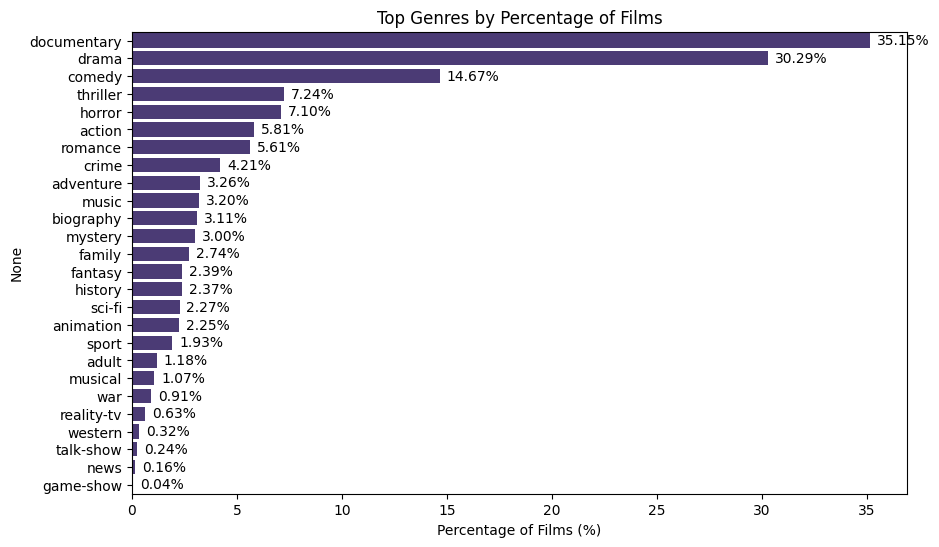

In [ ]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres_np,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]

top5_genres = sorted_genres_perc

plt.figure(figsize=(10,6))
plot = sns.barplot(x=top5_genres.values, y=top5_genres.index, orient="h")

for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}%',
                   (p.get_width(), p.get_y() + p.get_height() / 2),
                   ha='left', va='center',
                   fontsize=10, color='black', xytext=(5, 0),
                   textcoords='offset points')

plt.xlabel("Percentage of Films (%)")
plt.title("Top Genres by Percentage of Films")
plt.show()


In [ ]:
merged_basics_ratings_2020 = pd.merge(df_title_basics_2020, df_ratings, on="tconst")

merged_basics_ratings_2020.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0.0,2020.0,NaN,70,Drama,6.4,186
1,tt0230622,movie,Parinati,Parinati,0.0,2020.0,NaN,125,Drama,7.8,81
2,tt0368133,movie,The Promise of Perfume,The Promise of Perfume,0.0,2020.0,NaN,57,Documentary,6.6,8
3,tt0438755,movie,About Face: The Story of the Jewish Refugee So...,About Face: The Story of the Jewish Refugee So...,0.0,2020.0,NaN,94,Documentary,8.2,45
4,tt0446792,movie,Surviving in L.A.,Surviving in L.A.,0.0,2020.0,NaN,NaN,"Comedy,Drama,Romance",7.7,29


In [ ]:
merged_basics_ratings_2020.shape

(9566, 11)

In [ ]:
merged_basics_ratings_2020['tconst'].nunique()

9566

In [ ]:
Total_movies_2020 = merged_basics_ratings_2020['tconst'].nunique()
Total_movies_votes_2020 = merged_basics_ratings_2020['numVotes'].notnull().sum()
Total_movies_rating_2020 = merged_basics_ratings_2020['averageRating'].notnull().sum()
Average_rating_2020 = merged_basics_ratings_2020['averageRating'].mean()
Total_voters_2020 = merged_basics_ratings_2020['numVotes'].sum()
Average_voters_2020 = merged_basics_ratings_2020['numVotes'].mean()
print("The total number of 2020 movies is", Total_movies_2020, "\nThe number of total 2020 movies with votes is", Total_movies_votes_2020, "\nThe number of total 2020 movies with rating is", Total_movies_rating_2020, "\nThe average rating for 2020 movies is", Average_rating_2020, "\nThe total number of voters for 2020 movies is",Total_voters_2020, "\nThe average number of voters for 2020 movies is",Average_voters_2020)

The total number of 2020 movies is 9566 
The number of total 2020 movies with votes is 9566 
The number of total 2020 movies with rating is 9566 
The average rating for 2020 movies is 6.1981078820823745 
The total number of voters for 2020 movies is 17574283 
The average number of voters for 2020 movies is 1837.1610913652519


Again, list the genres with the highest voter count and sort the table according to the number of votes:

In [ ]:
merged_basics_ratings_2020 = merged_basics_ratings_2020.dropna(subset=['genres'])

merged_basics_ratings_2020 = merged_basics_ratings_2020.assign(genres=merged_basics_ratings_2020['genres'].str.split(',')).explode('genres')

genre_votes_sum = merged_basics_ratings_2020.groupby('genres')['numVotes'].sum()

genre_votes_sum_sorted = genre_votes_sum.sort_values(ascending=False)

print("Total number of votes for each genre:")
print(genre_votes_sum_sorted)


Total number of votes for each genre:
genres
Drama          8528060
Comedy         5601719
Action         5541442
Thriller       3452983
Adventure      3028855
Horror         2787836
Crime          2719891
Mystery        2620018
Romance        1705753
Sci-Fi         1619317
Animation      1039387
Fantasy        1010520
Documentary     825778
Biography       816047
History         777562
Family          514887
Music           420211
War             325713
Sport           189356
Western         123170
Musical          84428
Reality-TV         530
Adult              318
Talk-Show          230
News               175
Game-Show            9
Name: numVotes, dtype: int64


In [ ]:
merged_basics_ratings_2020 = merged_basics_ratings_2020.dropna(subset=['genres'])

merged_basics_ratings_2020 = merged_basics_ratings_2020.assign(genres=merged_basics_ratings_2020['genres'].str.split(',')).explode('genres')

genre_votes_sum = merged_basics_ratings_2020.groupby('genres')['averageRating'].mean()

genre_votes_sum_sorted = genre_votes_sum.sort_values(ascending=False)

print("Average Rating for each genre:")
print(genre_votes_sum_sorted)


Average Rating for each genre:
genres
Game-Show      8.400000
Documentary    7.108383
Music          6.921116
Biography      6.889406
Adult          6.791667
Sport          6.749080
Musical        6.736364
History        6.725510
News           6.640000
War            6.315094
Animation      6.284016
Drama          6.115567
Romance        6.064820
Adventure      5.850488
Crime          5.824057
Comedy         5.818516
Family         5.783742
Fantasy        5.696711
Action         5.673244
Mystery        5.498473
Reality-TV     5.476923
Sci-Fi         5.290226
Western        5.278125
Thriller       5.235944
Talk-Show      5.033333
Horror         4.674385
Name: averageRating, dtype: float64


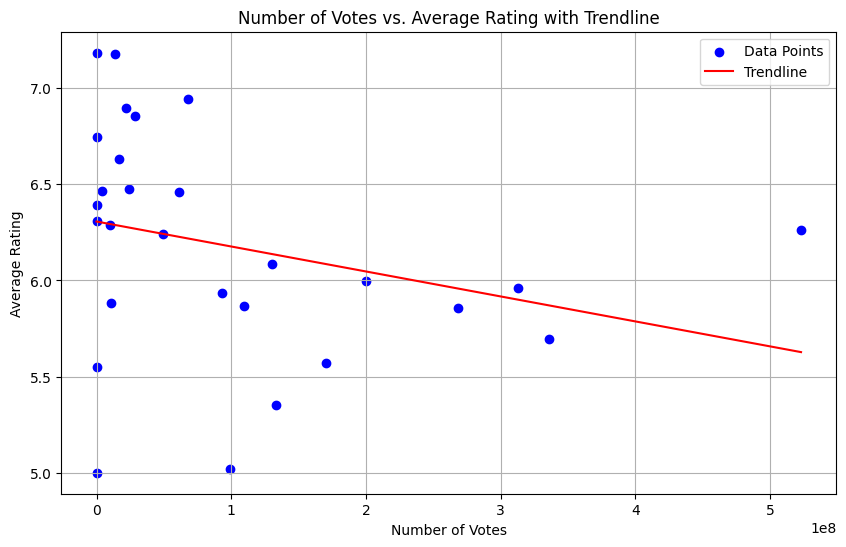

Correlation Coefficient: -0.28492088723917874


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
votes = [522985503, 335993916, 312775874, 267987155, 200225163, 170450277, 133038573, 130293466, 109625871, 99460629, 93483757, 68007440, 61152188, 49450552, 28285151, 24021231, 21959059, 16745915, 13934303, 10463467, 9916867, 3900963, 294968, 237995, 4193, 1281, 1021, 7]
ratings = [6.262987, 5.695824, 5.962904, 5.858385, 5.996155, 5.572794, 5.349673, 6.086611, 5.865493, 5.019007, 5.936045, 6.942858, 6.458062, 6.242074, 6.853951, 6.476756, 6.895077, 6.632153, 7.177647, 5.880549, 6.286206, 6.463254, 5.549644, 7.184357, 6.746491, 6.390, 6.309091, 5.0]

votes_array = np.array(votes)
ratings_array = np.array(ratings)

slope, intercept, r_value, p_value, std_err = linregress(votes_array, ratings_array)
trendline = slope * votes_array + intercept

plt.figure(figsize=(10, 6))
plt.scatter(votes_array, ratings_array, color='blue', label='Data Points')

plt.plot(votes_array, trendline, color='red', label='Trendline')

plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.title('Number of Votes vs. Average Rating with Trendline')

plt.legend()

plt.grid(True)
plt.show()

print("Correlation Coefficient:", r_value)


Now list the movies with the highest voter count,

In [ ]:
merged_basics_ratings_2020 = pd.merge(df_title_basics_2020, df_ratings, on="tconst")
merged = merged_basics_ratings_2020.sort_values(by="numVotes",ascending=False)
merged[["numVotes","primaryTitle","startYear","genres","averageRating"]].iloc[:20,:]

,numVotes,primaryTitle,startYear,genres,averageRating
7972,585121,Tenet,2020.0,"Action,Sci-Fi,Thriller",7.3
7342,375546,Soul,2020.0,"Adventure,Animation,Comedy",8.0
8088,290277,Wonder Woman 1984,2020.0,"Action,Adventure,Fantasy",5.4
8573,269852,A Quiet Place Part II,2020.0,"Drama,Horror,Sci-Fi",7.2
8302,263160,Birds of Prey,2020.0,"Action,Comedy,Crime",6.1
8899,260737,Extraction,2020.0,"Action,Thriller",6.8
525,252978,The Invisible Man,2020.0,"Drama,Horror,Mystery",7.1
8349,216733,Enola Holmes,2020.0,"Action,Adventure,Crime",6.6
9333,209679,Promising Young Woman,2020.0,"Crime,Drama,Mystery",7.5
251,192448,Another Round,2020.0,Drama,7.7


Top 20 films according to rating, a *precondition is added to avoid listing “unknown”* high rated films

In [ ]:
merged_basics_ratings_2020['numVotes'].mean()

1837.1610913652519

In [ ]:
merged_basics_ratings_2020 = pd.merge(df_title_basics_2020, df_ratings, on="tconst")
merged = merged_basics_ratings_2020[merged_basics_ratings_2020.numVotes>200000].sort_values(by="averageRating",ascending=False)
merged[["averageRating","primaryTitle","startYear","genres","numVotes"]].iloc[:20,:]

,averageRating,primaryTitle,startYear,genres,numVotes
7342,8.0,Soul,2020.0,"Adventure,Animation,Comedy",375546
9333,7.5,Promising Young Woman,2020.0,"Crime,Drama,Mystery",209679
7972,7.3,Tenet,2020.0,"Action,Sci-Fi,Thriller",585121
8573,7.2,A Quiet Place Part II,2020.0,"Drama,Horror,Sci-Fi",269852
525,7.1,The Invisible Man,2020.0,"Drama,Horror,Mystery",252978
8899,6.8,Extraction,2020.0,"Action,Thriller",260737
8349,6.6,Enola Holmes,2020.0,"Action,Adventure,Crime",216733
8302,6.1,Birds of Prey,2020.0,"Action,Comedy,Crime",263160
8088,5.4,Wonder Woman 1984,2020.0,"Action,Adventure,Fantasy",290277


# Name Basics Table

In [ ]:
df_name_basics = pickle.load(open("/content/drive/MyDrive/extracted/name.basics.sav","rb"))
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0075213,tt0117057,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,soundtrack,writer","tt0077975,tt0078723,tt0080455,tt0072562"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0069467,tt0083922,tt0050976"


In [ ]:
df_name_basics_copy = df_name_basics.copy()
df_name_basics_copy.drop(["birthYear","deathYear","primaryProfession","knownForTitles"],axis=1,inplace=True)
df_name_basics_copy.head()

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman


# Title Principals Table

In [ ]:
import pandas as pd
import pickle
import glob

def load_and_concatenate_chunks(file_pattern):
    files = glob.glob(file_pattern)
    dfs = []
    for file in files:
        df_chunk = pickle.load(open(file, "rb"))
        dfs.append(df_chunk)
    return pd.concat(dfs, ignore_index=True)

df_title_principals0 = load_and_concatenate_chunks("/content/drive/MyDrive/extracted/title.principals_chunk_*.sav")


In [ ]:
df_title_principals0.head()

,tconst,nconst,category
0,tt0000001,nm1588970,self
1,tt0000001,nm0005690,director
2,tt0000001,nm0374658,cinematographer
3,tt0000002,nm0721526,director
4,tt0000002,nm1335271,composer


In [ ]:
df_title_principals = df_title_principals0.copy()

df_title_principals = df_title_principals[(df_title_principals.category == "actor") | (df_title_principals.category == "actress")]
df_title_principals.to_csv('filtered_title_principals.tsv', sep='\t', index=False)
df_title_principals.head()

,tconst,nconst,category
11,tt0000005,nm0443482,actor
12,tt0000005,nm0653042,actor
16,tt0000007,nm0179163,actor
17,tt0000007,nm0183947,actor
21,tt0000008,nm0653028,actor
